# Stream function plot

In [1]:
# Functions to save and load variables/data

def pickle_save(name, path, data, verbose=True):
    if not os.path.exists(path):
        os.makedirs(path)
    full_name = (os.path.join(path,name+ '.npy'))


    with open(full_name, 'wb') as f2:
        pickle.dump(data, f2)
    if verbose:
        print('saved at : ',full_name)

def pickle_load(name, path, verbose=True):
    #if not os.path.exists(path):
    #    os.makedirs(path)
    full_name= (os.path.join(path,name+ '.npy'))

    with open(full_name, 'r') as f:
        data=pickle.load(f)

    if verbose:
        print('loaded from : ',full_name)
    return data

In [2]:
%matplotlib inline

# Import packages
import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, pi
import h5py
from scipy.io import loadmat
from mpl_toolkits.basemap import Basemap
import netCDF4
from scipy import interpolate
import os
import pickle
import cmocean

plot_path_1993_2017='/home/ebent/plots/1993_2017/'
plot_path_2006_2011='/home/ebent/plots/2006_2011/'
plot_path_jup='/home/ebent/plots/2006_2011/jup2/'
load_path='/data/mmazloff/AVISO/'
load_path2='/data/SO12/runs/RUN_BLING_Dec2017/SO12_RUN/DIAGNOSTICS/'
load_path3='/data/soccom/GRID_12/'

In [3]:
# Load files
file1 = netCDF4.Dataset(load_path2+'so12_i0_year2006_5day_Salt.nc','r')

# Mercator grid for salinity with domain of validation of model
lon_min = 1800
lon_max = 3240
lat_min = 0
lat_max = 1170

lat = file1.variables['lat'][lat_min:lat_max]
lon = file1.variables['lon'][lon_min:lon_max]
Lon, Lat = np.meshgrid(lon,lat)

# These are the indexes when taking the same size as in Matlab

lon_min   = 1440 
lon_max   = 3241 # 3240 si comme dans Traj_big_domain
lat_min   = 0 
lat_max   = 1024 # 1023 si comme dans Traj_big_domain

# 
YC        = file1.variables['lat'][lat_min:lat_max] # de -77,99 a -40,11
XC        = file1.variables['lon'][lon_min:lon_max] # de 120,04 a 269,95
XC, YC = np.meshgrid(XC,YC)

# This is hFacC for the SOUTHERN HEMISPHERE

file_h = h5py.File(load_path3 + 'grid.mat','r')

hFacC = file_h.get('hFacC')
hFacC = np.array(hFacC)
Xf = file_h.get('XC')
Xf = np.array(Xf)
Yf = file_h.get('YC')
Yf = np.array(Yf)

hfacc = hFacC[:, lat_min:lat_max, lon_min:lon_max]

In [4]:
background = ['mean_Salt_surf_2',
              'mean_Salt_30_2',
              'mean_Salt_100_2',
              'mean_Salt_200_2',
              'mean_Salt_500_2',
              'mean_Theta_surf_2',
              'mean_Theta_30_2',
              'mean_Theta_100_2',
              'mean_Theta_200_2',
              'mean_Theta_500_2']

***

# SF with all levels of depth
Obtained with code stream_function.py

In [5]:
BIG_SF = pickle_load('SF_2', '/data/ebent/')

('loaded from : ', '/data/ebent/SF_2.npy')


In [74]:
southern_front = pickle_load('ACC_southern_front', '/data/ebent/', verbose=False)

# Function to plot

In [144]:
def plot_SF(figsize, proj, SF_study, hfacc_level, T_or_S_field, cmap, cbar_title, color):
    
    fig     = plt.figure(figsize=figsize)
    T_or_S_field = pickle_load(T_or_S_field, '/data/ebent/Bigger_domain/', verbose=False)

        
    if proj=='ortho':
        m       = Basemap(projection='ortho', lat_0=-90, lon_0=0, resolution="l")
    elif proj=='merc':
    elif proj=='lamb':
        m       = Basemap(llcrnrlon=162.,llcrnrlat=-79.,urcrnrlon=230.,urcrnrlat=-60.,rsphere=(6378137.00,6356752.3142),resolution='l',area_thresh=1000.,projection='lcc',lat_1=65.,lon_0=180.)
    
    # Plot the continents thanks to hFacC==0, choose the level : 0=surf, 9=30m
    xm, ym  = m(Xf, Yf)
    im      = m.contourf(xm, ym, hFacC[hfacc_level,...], extend='both', cmap='Greys_r')
    
    # Plot the salinity or temperature
    xm, ym  = m(XC, YC)
    im      = m.contourf(xm, ym, T_or_S_field, levels=np.linspace(T_or_S_field.min(),T_or_S_field.max(),50), extend='both', cmap=cmap)
    cbar    = m.colorbar(im,pad='10%')
    cbar.set_label(cbar_title, fontsize =16)
    
    # Plot the stream function
    SF = SF_study
    xm, ym  = m(XC, YC)
    cs      = m.contour(xm, ym, SF, extend='both', levels=np.linspace(np.nanmin(SF), np.nanmax(SF), 10), colors=color, linewidth=0.3)
    plt.clabel(cs, inline=True, fontsize=8)
    
    # Plot the red line
    #xm, ym  = m(x_p, y_p)
    #cs      = m.plot(xm, ym, '-r') 
    xm, ym  = m(XC, YC)
    im      = m.contour(xm, ym, southern_front, colors='r')
    
    #xm, ym  = m(x, y)
    #xm, ym  = m(XC[np.where(BIG_SF_2==1.928)], YC[np.where(BIG_SF_2==1.928)])
    #im      = m.plot(xm, ym, '-', color='r',linewidth=3.)    
    #plt.clabel(cs, inline=True, fontsize=8)
    
        
    m.drawparallels(np.arange(-80.,-30.,10), labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(120.,280.,10), labels=[0, 0, 0, 1])

***

### Plot with the actual size of cropped domain (called bigger domain)

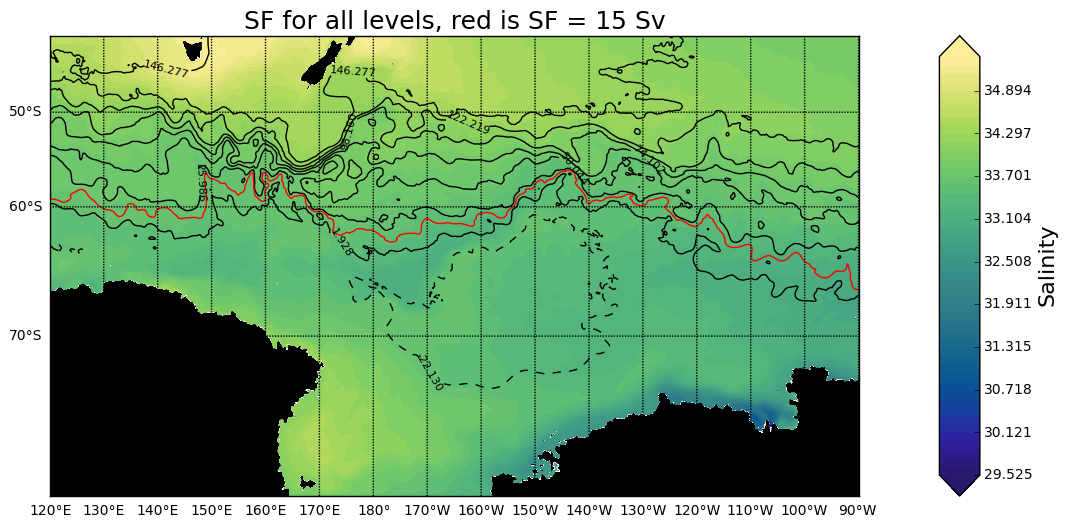

In [152]:
plot_SF(figsize=(12,12) , proj='merc', SF_study=BIG_SF, hfacc_level=0, T_or_S_field=background[0], cmap=cmocean.cm.haline, cbar_title='Salinity', color='k')
plt.title('SF for all levels, red is SF = 15 Sv', fontsize=18)

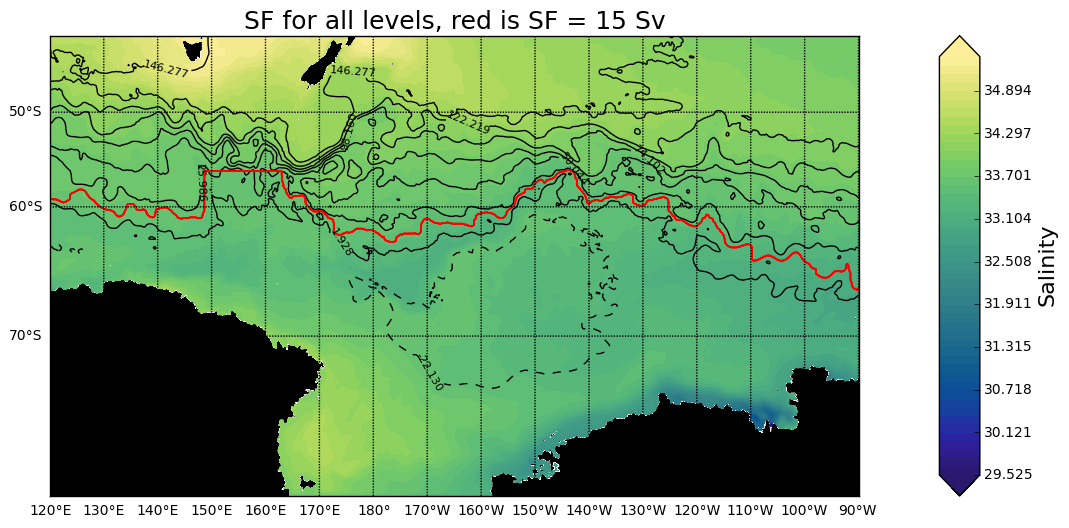

In [78]:
plot_SF(figsize=(12,12) , proj='merc', SF_study=BIG_SF, hfacc_level=0, T_or_S_field=background[0], cmap=cmocean.cm.haline, cbar_title='Salinity', color='k')
plt.title('SF for all levels, red is SF = 15 Sv', fontsize=18)

### Plot with size of mean_Salt and mean_Theta

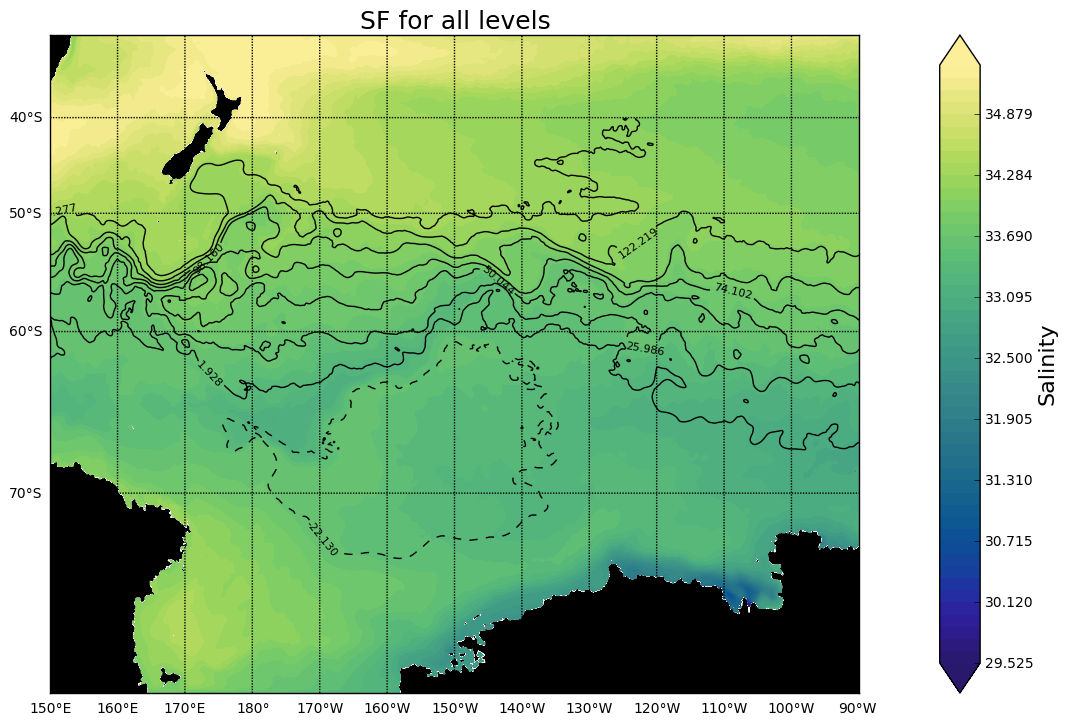

In [13]:
plot_SF(figsize=(12,12) , proj='merc', SF_study=BIG_SF, hfacc_level=0, T_or_S_field=background[0], cmap=cmocean.cm.haline, cbar_title='Salinity', color='k')
plt.title('SF for all levels', fontsize=18)

***

# How to select the red line which is  SF = 15 Sv

### This front is plotted in index coordinates

In [6]:
# Create a meshgrid to plot in index coordinates
xc = np.arange(1801)
yc = np.arange(1024)
xc, yc = np.meshgrid(xc,yc)

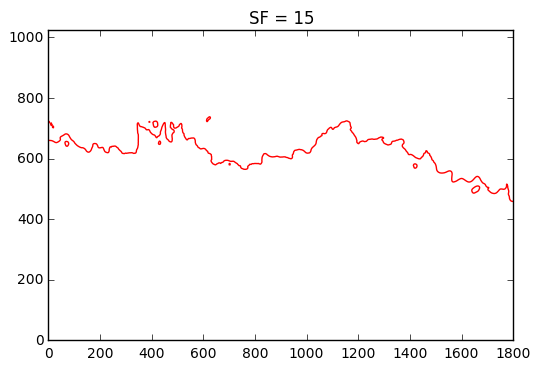

In [11]:
SF      = BIG_SF

# If I wanted to have the front in degrees coordinates, replace xc and yc by XC and YC

cs      = plt.contour(xc, yc, SF, extend='both', levels=np.arange(15, 16), colors='r', linewidth=0.7) 
plt.title('SF = 15')  

In [8]:
p = cs.collections[0].get_paths()

In [9]:
v = p[5].vertices # p[5] is exactly the ensemble of the red line

In [10]:
x_p = v[:,0]
y_p = v[:,1]

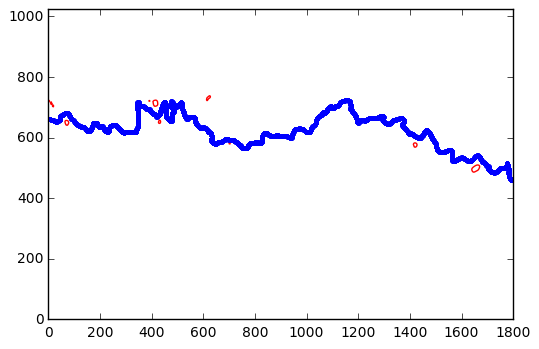

In [15]:
plt.contour(xc, yc, SF, extend='both', levels=np.arange(15, 16), colors='r', linewidth=0.7)
plt.plot(x_p, y_p, '.b')

In [12]:
southern_front = np.zeros((SF.shape[0],SF.shape[1]))

In [13]:
yp = np.int_(np.floor(y_p))
xp = np.int_(np.floor(x_p))

In [14]:
southern_front[yp,xp]=1

<matplotlib.colorbar.Colorbar instance at 0xd888f80>

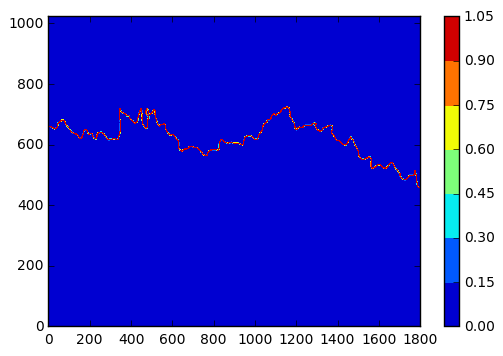

In [19]:
plt.contourf(xc, yc, southern_front)
plt.colorbar()

### This loop takes value max and fills with 1s under it (as line sometimes curves and there are several y equal to 1 == not a perfect function)

In [16]:
for x in range(southern_front.shape[1]-1, -1, -1):
    for y in range(southern_front.shape[0]-1, -1, -1): 
        if southern_front[y,x]==1:
            southern_front[:y,x]=1
            #southern_front[y:,x]=0 # use for filling with ones under value min, loop has to go forward

In [17]:
# Box under 56.5S to fill with ones
ix = (XC<=163.) & (XC>=148.7)
iy = (YC<=-56.5) & (YC>=-59.5)

In [19]:
ix.shape

(1024, 1801)

In [129]:
for i in range(XC.shape[0]):
    for j in range(XC.shape[1]):
        if ix[i,j] != iy[i,j]:
            ix[i,j]=False   

In [130]:
southern_front[ix]=1

In [131]:
# Box above 56.5S to fill with zeros
ix = (XC<=163.) & (XC>=148.7)
iy = (YC<=-55.) & (YC>=-56.5)

In [132]:
for i in range(XC.shape[0]):
    for j in range(XC.shape[1]):
        if ix[i,j] != iy[i,j]:
            ix[i,j]=False   

In [133]:
southern_front[ix]=0

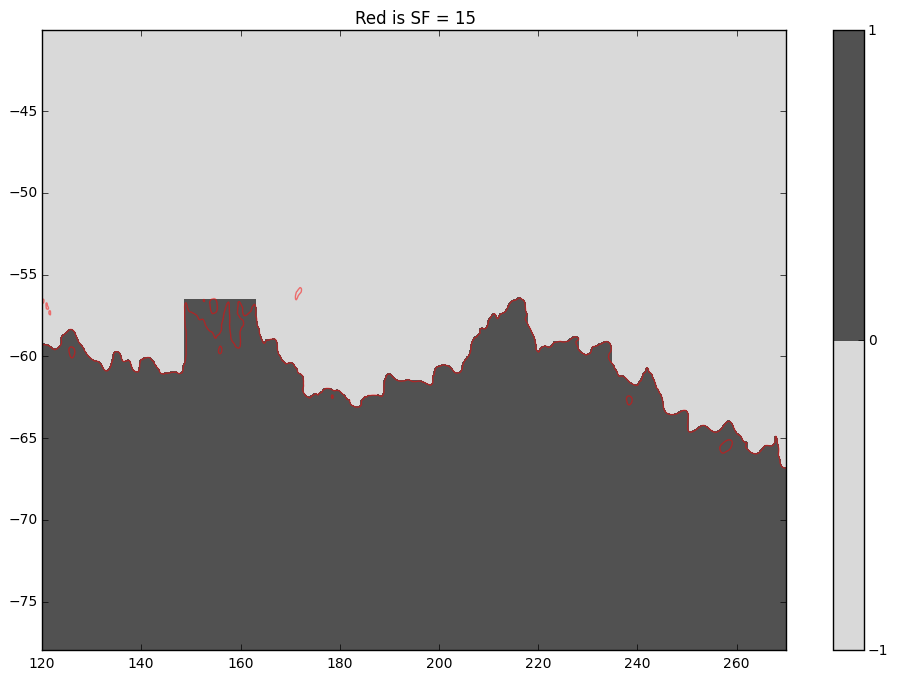

In [145]:
plt.figure(figsize=(12,8))
plt.contourf(XC, YC, southern_front, cmap='Greys', levels=np.arange(-1,2))
plt.colorbar()
#plt.contourf(XC, YC, ix, alpha=0.3)
#plt.contour(XC, YC, SF, extend='both', levels=np.arange(5, 6), colors='g', linewidth=1)
plt.contour(XC, YC, SF, extend='both', levels=np.arange(15, 16), colors='r', linewidth=1, alpha=0.5)
plt.title('Red is SF = 15')

In [146]:
pickle_save('ACC_southern_front', '/data/ebent/', southern_front)

('saved at : ', '/data/ebent/ACC_southern_front.npy')
